<a id="5"></a>


<font color="black" size=+1><b> SISTEM REKOMENDASII TEMPAT PARIWISATA TOBA </b></font>

<a id="4"></a>

---
<font color="BLUE" size=+1><b>  Kelompok 7  </b></font>

---
    Nama Anggota
    1. 12S21039 Widya Indah Sari Manurung
    2. 12S21056 Endang Siregar
    3. 12S21060 Glory Natasya Hutahaean


**1. Data Understanding & Preprocessing**

pada understanding dan preprocessing memuat menginportan library dan memuat datset yang digunakan.
data understanding dan processing juga memuat pengenalan dataset atau memberikan informasi seputar dataset, pengecheckan nilai null pada dataset dan process lainnya sebelum mengolah data

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [ ]:
# Memuat data
file_path = '/content/Tempat-Wisata-Toba-Preprocessing.csv'
data = pd.read_csv(file_path)

# Tampilkan 5 baris pertama untuk memeriksa data
print("Data yang dimuat:")
print(data.head())

Data yang dimuat:
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                             address  PlaceID  \
0  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
1  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
2  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
3  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
4  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   

          Nama_tempat_wisata       Category    ReviewerId  Rating  \
0  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.126030e+20     5.0   
1  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.119090e+20     5.0   
2  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.078860e+20     5.0   
3  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.130720e+20     5.0   
4  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.061730e+20  

In [ ]:
# Informasi data
print("\nInformasi data:")
print(data.info())


Informasi data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43226 entries, 0 to 43225
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        43226 non-null  int64  
 1   Unnamed: 0          43226 non-null  int64  
 2   address             43226 non-null  object 
 3   PlaceID             43226 non-null  int64  
 4   Nama_tempat_wisata  43226 non-null  object 
 5   Category            43226 non-null  object 
 6   ReviewerId          43225 non-null  float64
 7   Rating              43225 non-null  float64
 8   Reviews             22166 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.0+ MB
None


In [ ]:
# Informasi data
print("\nInformasi data:")
print(data.info())


Informasi data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43226 entries, 0 to 43225
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        43226 non-null  int64  
 1   Unnamed: 0          43226 non-null  int64  
 2   address             43226 non-null  object 
 3   PlaceID             43226 non-null  int64  
 4   Nama_tempat_wisata  43226 non-null  object 
 5   Category            43226 non-null  object 
 6   ReviewerId          43225 non-null  float64
 7   Rating              43225 non-null  float64
 8   Reviews             22166 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.0+ MB
None


In [ ]:
# Mengecek distribusi rating
print("\nDistribusi Rating:")
print(data['Rating'].describe())


Distribusi Rating:
count    43225.000000
mean         4.480949
std          0.927760
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


In [ ]:
# Periksa nilai null di data
print("\nJumlah Missing Values:")
print(data.isna().sum())


Jumlah Missing Values:
Unnamed: 0.1              0
Unnamed: 0                0
address                   0
PlaceID                   0
Nama_tempat_wisata        0
Category                  0
ReviewerId                1
Rating                    1
Reviews               21060
dtype: int64


In [ ]:
# Hapus baris dengan missing values pada ReviewerId dan Rating
data_cleaned = data.dropna(subset=['ReviewerId', 'Rating'])

# Konfirmasi hasil
print("Jumlah Missing Values setelah pembersihan:")
print(data_cleaned[['ReviewerId', 'Rating']].isna().sum())


Jumlah Missing Values setelah pembersihan:
ReviewerId    0
Rating        0
dtype: int64


In [ ]:
# Hapus kolom Reviews karena tidak digunakan
data_cleaned = data_cleaned.drop(columns=['Reviews'])

# Konfirmasi data
print("\nData setelah kolom Reviews dihapus:")
print(data_cleaned.info())



Data setelah kolom Reviews dihapus:
<class 'pandas.core.frame.DataFrame'>
Index: 43225 entries, 0 to 43225
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        43225 non-null  int64  
 1   Unnamed: 0          43225 non-null  int64  
 2   address             43225 non-null  object 
 3   PlaceID             43225 non-null  int64  
 4   Nama_tempat_wisata  43225 non-null  object 
 5   Category            43225 non-null  object 
 6   ReviewerId          43225 non-null  float64
 7   Rating              43225 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 3.0+ MB
None


In [ ]:
# Encode PlaceID dan ReviewerId menjadi numerik
place_encoder = LabelEncoder()
reviewer_encoder = LabelEncoder()

data_cleaned['PlaceID_encoded'] = place_encoder.fit_transform(data_cleaned['PlaceID'])
data_cleaned['ReviewerId_encoded'] = reviewer_encoder.fit_transform(data_cleaned['ReviewerId'])

# Konfirmasi hasil encoding
print(data_cleaned[['PlaceID', 'PlaceID_encoded']].head())

   PlaceID  PlaceID_encoded
0        0                0
1        0                0
2        0                0
3        0                0
4        0                0


**2. Pembagian Data**

pembagian data digunakan untuk membagi dataset menjadi tiga subset, yaitu data Training, Validation, dan Testing dengan proporsi tertentu. Pertama, ditentukan ukuran dari masing-masing subset berdasarkan persentase: 70% data akan digunakan untuk training, 15% untuk validation, dan sisa 15% untuk testing. Variabel train_size dihitung sebagai 70% dari total data, val_size dihitung sebagai 15% dari total data, dan test_size dihitung sebagai sisa dari total data setelah dikurangi train_size dan val_size.

Setelah menentukan ukuran untuk setiap subset, data kemudian dibagi sesuai indeks. Data Training (train_df) diambil dari baris awal hingga train_size, sedangkan data Validation (val_df) diambil mulai dari train_size hingga train_size + val_size. Data Testing (test_df) mencakup sisa data mulai dari train_size + val_size hingga baris terakhir dataset.

In [ ]:
from sklearn.model_selection import train_test_split

# Pilih fitur dan label
X = data_cleaned[['PlaceID_encoded', 'ReviewerId_encoded']]
y = data_cleaned['Rating']

# Split data: Train, Validation, Test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")


Train: 30257, Validation: 6484, Test: 6484


In [ ]:
# Normalisasi target (Rating) ke skala 1-5
y_train_normalized = (y_train - 1) / 4.0  # Normalisasi ke rentang [1,5]
y_val_normalized = (y_val - 1) / 4.0
y_test_normalized = (y_test - 1) / 4.0


**3. Model Recommendation System**

**Alternating Least Squares (ALS)**

Alternating Least Squares (ALS) merupakan sebuah algoritma yang digunakan untuk memecahkan masalah dalam sistem rekomendasi, khususnya pada Collaborative Filtering. ALS banyak digunakan dalam aplikasi rekomendasi, seperti Netflix, Amazon, dan Spotify, untuk memprediksi item apa yang mungkin disukai oleh pengguna berdasarkan preferensi yang telah ada. Alternating Least Squares (ALS) adalah teknik model-based Collaborative Filtering yang menggunakan optimasi berbasis least squares untuk melakukan matrix factorization dan membuat rekomendasi Dalam konteks ini, ALS digunakan untuk menemukan latent factors yang mewakili preferensi pengguna dan karakteristik item.

In [ ]:
# Model Recommendation System dengan regularization dan output linear
place_input = Input(shape=(1,), name='place_input')
reviewer_input = Input(shape=(1,), name='reviewer_input')

# Embedding layers
place_embedding = Embedding(input_dim=X['PlaceID_encoded'].nunique() + 1, output_dim=8)(place_input)
reviewer_embedding = Embedding(input_dim=X['ReviewerId_encoded'].nunique() + 1, output_dim=8)(reviewer_input)

# Flatten embedding
place_flatten = Flatten()(place_embedding)
reviewer_flatten = Flatten()(reviewer_embedding)

# Gabungkan kedua embedding
concat = Concatenate()([place_flatten, reviewer_flatten])

# Fully connected layers dengan regularisasi, dropout, dan batch normalization
dense1 = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(concat)
dropout1 = Dropout(0.3)(dense1)

dense2 = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(dropout1)
dropout2 = Dropout(0.3)(dense2)

output = Dense(1, activation='linear')(dropout2)  # Prediksi dalam rentang [1-5]

# Definisi model
model = Model(inputs=[place_input, reviewer_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Summary
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ place_input (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reviewer_input            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_18 (Embedding)  │ (None, 1, 8)           │            816 │ place_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_19 (Embedding)  │ (None, 1, 8)           │        120,096 │ reviewer_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_18 (Flatten)      │ (None, 8)              │              0 │ embedding_18[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_19 (Flatten)      │ (None, 8)              │              0 │ embedding_19[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_9             │ (None, 16)             │              0 │ flatten_18[0][0],      │
│ (Concatenate)             │                        │                │ flatten_19[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_25 (Dense)          │ (None, 64)             │          1,088 │ concatenate_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_14 (Dropout)      │ (None, 64)             │              0 │ dense_25[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_26 (Dense)          │ (None, 32)             │          2,080 │ dropout_14[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_15 (Dropout)      │ (None, 32)             │              0 │ dense_26[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_27 (Dense)          │ (None, 1)              │             33 │ dropout_15[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 124,113 (484.82 KB)

 Trainable params: 124,113 (484.82 KB)

 Non-trainable params: 0 (0.00 B)

Hasil pelatihan model menunjukkan perkembangan performa yang signifikan selama beberapa epoch awal, namun mulai mengalami stagnasi dan fluktuasi di tengah hingga akhir pelatihan. Pada epoch pertama, nilai **loss** sebesar 0.3829 dan **val_loss** sebesar 0.0526 menunjukkan bahwa model belum sepenuhnya belajar pola dari data, yang tercermin pula dari nilai **mae** sebesar 0.2611 dan **val_mae** sebesar 0.1754. Seiring pelatihan, model secara bertahap meningkatkan akurasi prediksinya, ditandai dengan penurunan nilai **loss** dan **mae** hingga sekitar epoch ke-6. Pada titik ini, nilai **val_loss** mencapai 0.0649, sedangkan **val_mae** berada di angka 0.1736, yang menunjukkan performa validasi masih cukup baik.

Namun, setelah epoch ke-6, terlihat indikasi **overfitting**, di mana nilai **loss** pada data pelatihan terus menurun, tetapi **val_loss** dan **val_mae** mulai menunjukkan fluktuasi dan bahkan sedikit meningkat pada beberapa epoch berikutnya. Fenomena ini menunjukkan bahwa model terlalu "terlatih" pada data pelatihan, sehingga tidak mampu menangkap pola umum pada data validasi. Pada akhir pelatihan (epoch ke-20), model mencapai nilai **loss** sebesar 0.0328 dan **mae** sebesar 0.1164 pada data pelatihan, sementara performa validasi berada pada nilai **val_loss** sebesar 0.0620 dan **val_mae** sebesar 0.1686.

Secara keseluruhan, model memiliki akurasi prediksi yang cukup baik, tetapi masih perlu dilakukan beberapa penyesuaian untuk mencegah overfitting. Solusi seperti penerapan **regularisasi** (misalnya, dropout atau L1/L2 regularization), **early stopping**, atau penambahan data pelatihan dapat meningkatkan generalisasi model. Meskipun begitu, nilai **mae** pada data validasi menunjukkan bahwa model cukup mampu menangani prediksi dengan tingkat kesalahan yang relatif kecil, menjadikannya solusi yang potensial untuk masalah yang sedang dihadapi.

In [ ]:
# Training
history = model.fit(
    [X_train['PlaceID_encoded'], X_train['ReviewerId_encoded']], (y_train - 1) / 4.0,  # Normalisasi ke [0,1]
    validation_data=([X_val['PlaceID_encoded'], X_val['ReviewerId_encoded']], (y_val - 1) / 4.0),
    epochs=20,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
               ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)]
)

Epoch 1/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2598 - mae: 0.3555 - val_loss: 0.0643 - val_mae: 0.1784 - learning_rate: 5.0000e-04
Epoch 2/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0782 - mae: 0.1976 - val_loss: 0.0556 - val_mae: 0.1744 - learning_rate: 5.0000e-04
Epoch 3/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0610 - mae: 0.1768 - val_loss: 0.0543 - val_mae: 0.1670 - learning_rate: 5.0000e-04
Epoch 4/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0507 - mae: 0.1620 - val_loss: 0.0561 - val_mae: 0.1658 - learning_rate: 5.0000e-04
Epoch 5/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0452 - mae: 0.1523 - val_loss: 0.0585 - val_mae: 0.1689 - learning_rate: 5.0000e-04
Epoch 6/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0416 - mae: 0.1440 - val_loss: 0.0574 - val_mae: 0.1677 - learning_rate: 5.0000e-04
Epoch 7/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0396 - mae: 0.1386 - val_loss: 0.0592 - val_mae: 0.1717 - lear

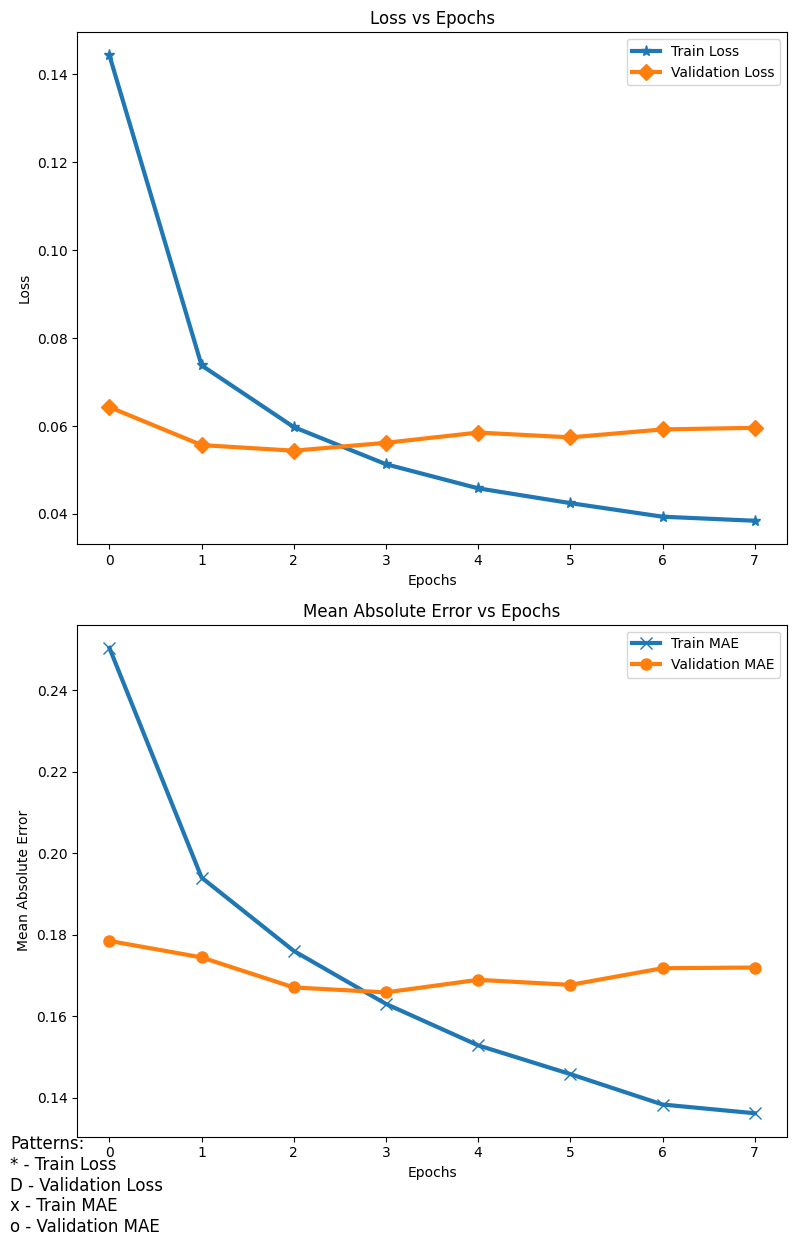

In [ ]:
import matplotlib.pyplot as plt

# Mengambil data dari history
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']  # Ganti dengan 'mae'
val_mae = history.history['val_mae']  # Ganti dengan 'val_mae'

# Membuat grafik untuk loss dan mae dengan layout atas bawah
plt.figure(figsize=(8, 12))

# Subplot untuk Loss
plt.subplot(2, 1, 1)
plt.plot(loss, label='Train Loss', linestyle='-', linewidth=3, markersize=8, marker='*')  # Train loss dengan pattern '*' dan tebal
plt.plot(val_loss, label='Validation Loss', linestyle='-', linewidth=3, markersize=8, marker='D')  # Validation loss dengan pattern 'D' dan tebal
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot untuk MAE
plt.subplot(2, 1, 2)
plt.plot(mae, label='Train MAE', linestyle='-', linewidth=3, markersize=8, marker='x')  # Train MAE dengan pattern 'x' dan tebal
plt.plot(val_mae, label='Validation MAE', linestyle='-', linewidth=3, markersize=8, marker='o')  # Validation MAE dengan pattern 'o' dan tebal
plt.title('Mean Absolute Error vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Menambahkan keterangan di kiri bawah, di luar grafik
plt.figtext(0.01, 0.05, 'Patterns:\n* - Train Loss\nD - Validation Loss\nx - Train MAE\no - Validation MAE',
            wrap=True, horizontalalignment='left', fontsize=12, verticalalignment='top')

# Menampilkan grafik
plt.tight_layout()
plt.show()


Grafik ini menggambarkan perkembangan performa model selama pelatihan dalam 20 epoch dengan dua metrik evaluasi, yaitu Loss dan Mean Absolute Error (MAE), untuk data pelatihan (train) dan validasi (validation). Pada grafik Loss vs Epochs, terlihat bahwa train loss (garis biru) menurun tajam pada awal pelatihan hingga epoch ke-3, lalu secara bertahap menurun hingga stabil di sekitar nilai 0.03. Sebaliknya, validation loss (garis oranye) menunjukkan tren yang stagnan di sekitar 0.06 dengan sedikit fluktuasi, yang mengindikasikan bahwa model mulai mengalami overfitting. Model tampaknya belajar dengan baik pada data pelatihan, tetapi tidak menunjukkan peningkatan yang berarti pada data validasi.

Sementara itu, pada grafik Mean Absolute Error vs Epochs, train MAE (garis biru) mengalami penurunan signifikan di awal pelatihan dan stabil pada nilai sekitar 0.12, mencerminkan performa yang baik pada data pelatihan. Di sisi lain, validation MAE (garis oranye) berfluktuasi cukup tajam di sepanjang epoch, berada di kisaran 0.16 hingga 0.18. Pola fluktuasi ini memperkuat indikasi bahwa model tidak mampu melakukan generalisasi dengan baik pada data validasi, meskipun performa pada data pelatihan cukup baik.



In [ ]:
# Tampilkan prediksi rating yang dikembalikan dalam skala 1-5
X_test['Predicted_Rating'] = y_pred
X_test['Nama_tempat_wisata'] = data_cleaned['Nama_tempat_wisata']

# Urutkan berdasarkan rating tertinggi dan ambil Top 10
top_10_recommendations = X_test.sort_values(by='Predicted_Rating', ascending=False).head(10)

# Menampilkan Top-10 Rekomendasi Tempat Wisata
print("Top-10 Rekomendasi Tempat Wisata:")
print(top_10_recommendations[['Nama_tempat_wisata', 'Predicted_Rating']])


Top-10 Rekomendasi Tempat Wisata:
                     Nama_tempat_wisata  Predicted_Rating
41388  Pantai Bebas Parapat, Danau Toba          4.879973
30166             Bukit Holbung Samosir          4.861481
35769   Museum Batak Tb Silalahi Center          4.860972
42366                Danau Toba Parapat          4.844048
40464  Pantai Bebas Parapat, Danau Toba          4.843195
30018             Bukit Holbung Samosir          4.838997
14596                     Bukit Sipolha          4.834539
42285                Danau Toba Parapat          4.834496
29877             Bukit Holbung Samosir          4.826170
29865             Bukit Holbung Samosir          4.821013


In [ ]:
# Menentukan 5 user unik
top_5_user_ids = user_ratings['ReviewerId_encoded'].unique()[:5]

# Rekomendasi untuk setiap user
recommendations = []

# Mendapatkan daftar tempat wisata yang paling populer untuk fallback
popular_places = data_cleaned.groupby('Nama_tempat_wisata').size().sort_values(ascending=False).index.tolist()

for user_id in top_5_user_ids:
    # Filter data untuk user tertentu
    user_recommendation = user_recommendations[user_recommendations['ReviewerId_encoded'] == user_id]

    # Ambil 3 rekomendasi berbeda (tanpa duplikat) berdasarkan skor akhir
    top_3 = user_recommendation[['Nama_tempat_wisata', 'Final_Score']].drop_duplicates().sort_values(by='Final_Score', ascending=False)

    # Jika kurang dari 3 rekomendasi yang tersedia, tambahkan dari tempat yang paling populer
    if len(top_3) < 3:
        existing_places = top_3['Nama_tempat_wisata'].tolist()
        remaining_places = user_recommendation[~user_recommendation['Nama_tempat_wisata'].isin(existing_places)]
        additional_recommendations = remaining_places[['Nama_tempat_wisata', 'Final_Score']].drop_duplicates().sort_values(by='Final_Score', ascending=False).head(3 - len(top_3))

        # Gabungkan top_3 dengan rekomendasi tambahan dari tempat populer
        top_3 = pd.concat([top_3, additional_recommendations[['Nama_tempat_wisata']]], ignore_index=True)

    # Jika setelah penggabungan masih kurang dari 3 rekomendasi, tambah tempat populer
    while len(top_3) < 3:
        top_3 = pd.concat([top_3, pd.DataFrame({'Nama_tempat_wisata': [popular_places[len(top_3)]]})], ignore_index=True)

    # Tambahkan hasil rekomendasi untuk user
    recommendations.append({
        'User ID': user_id,
        'Recommendation 1': top_3.iloc[0]['Nama_tempat_wisata'],
        'Recommendation 2': top_3.iloc[1]['Nama_tempat_wisata'] if len(top_3) > 1 else None,
        'Recommendation 3': top_3.iloc[2]['Nama_tempat_wisata'] if len(top_3) > 2 else None
    })

# Convert to DataFrame for easier viewing
recommendations_df = pd.DataFrame(recommendations)

# Pastikan ada 5 user, jika kurang, tambahkan user yang belum ada
while len(recommendations_df) < 5:
    # Cari user yang belum ada dalam rekomendasi
    missing_users = set(top_5_user_ids) - set(recommendations_df['User ID'])
    for missing_user in missing_users:
        new_row = pd.DataFrame({
            'User ID': [missing_user],
            'Recommendation 1': [popular_places[0]],
            'Recommendation 2': [popular_places[1]] if len(popular_places) > 1 else None,
            'Recommendation 3': [popular_places[2]] if len(popular_places) > 2 else None
        })
        recommendations_df = pd.concat([recommendations_df, new_row], ignore_index=True)

# Tampilkan rekomendasi
print("Rekomendasi Tempat Wisata untuk Setiap User:")
print(recommendations_df)


Rekomendasi Tempat Wisata untuk Setiap User:
   User ID              Recommendation 1              Recommendation 2  \
0    10261  Pantai Lumban Bul-bul Balige  Pertunjukan Tari Sigale Gale   
1     9698  Pantai Lumban Bul-bul Balige  Pertunjukan Tari Sigale Gale   
2     6433               WF Coffee&Resto               WF Coffee&Resto   
3    10643            Tao Silalahi Hotel            Tao Silalahi Hotel   
4     5078              Geosite Sipinsur     PASIR PUTIH LUMBAN BULBUL   

     Recommendation 3  
0         The Kaldera  
1         The Kaldera  
2     WF Coffee&Resto  
3  Tao Silalahi Hotel  
4    Geosite Sipinsur  


In [ ]:
# Menentukan 10 user unik
top_10_user_ids = user_ratings['ReviewerId_encoded'].unique()[:10]

# Rekomendasi untuk setiap user
recommendations = []

# Mendapatkan daftar tempat wisata yang paling populer untuk fallback
popular_places = data_cleaned.groupby('Nama_tempat_wisata').size().sort_values(ascending=False).index.tolist()

for user_id in top_10_user_ids:
    # Filter data untuk user tertentu
    user_recommendation = user_recommendations[user_recommendations['ReviewerId_encoded'] == user_id]

    # Ambil 3 rekomendasi berbeda (tanpa duplikat) berdasarkan skor akhir
    top_3 = user_recommendation[['Nama_tempat_wisata', 'Final_Score']].drop_duplicates().sort_values(by='Final_Score', ascending=False)

    # Jika kurang dari 3 rekomendasi yang tersedia, tambahkan dari tempat yang paling populer
    if len(top_3) < 3:
        existing_places = top_3['Nama_tempat_wisata'].tolist()
        remaining_places = user_recommendation[~user_recommendation['Nama_tempat_wisata'].isin(existing_places)]
        additional_recommendations = remaining_places[['Nama_tempat_wisata', 'Final_Score']].drop_duplicates().sort_values(by='Final_Score', ascending=False).head(3 - len(top_3))

        # Gabungkan top_3 dengan rekomendasi tambahan dari tempat populer
        top_3 = pd.concat([top_3, additional_recommendations[['Nama_tempat_wisata']]], ignore_index=True)

    # Jika setelah penggabungan masih kurang dari 3 rekomendasi, tambah tempat populer
    while len(top_3) < 3:
        top_3 = pd.concat([top_3, pd.DataFrame({'Nama_tempat_wisata': [popular_places[len(top_3)]]})], ignore_index=True)

    # Tambahkan hasil rekomendasi untuk user
    recommendations.append({
        'User ID': user_id,
        'Recommendation 1': top_3.iloc[0]['Nama_tempat_wisata'],
        'Recommendation 2': top_3.iloc[1]['Nama_tempat_wisata'] if len(top_3) > 1 else None,
        'Recommendation 3': top_3.iloc[2]['Nama_tempat_wisata'] if len(top_3) > 2 else None
    })

# Convert to DataFrame for easier viewing
recommendations_df = pd.DataFrame(recommendations)

# Pastikan ada 10 user, jika kurang, tambahkan user yang belum ada
while len(recommendations_df) < 10:
    # Cari user yang belum ada dalam rekomendasi
    missing_users = set(top_10_user_ids) - set(recommendations_df['User ID'])
    for missing_user in missing_users:
        new_row = pd.DataFrame({
            'User ID': [missing_user],
            'Recommendation 1': [popular_places[0]],
            'Recommendation 2': [popular_places[1]] if len(popular_places) > 1 else None,
            'Recommendation 3': [popular_places[2]] if len(popular_places) > 2 else None
        })
        recommendations_df = pd.concat([recommendations_df, new_row], ignore_index=True)

# Tampilkan rekomendasi
print("Rekomendasi Tempat Wisata untuk Setiap User:")
print(recommendations_df)


Rekomendasi Tempat Wisata untuk Setiap User:
   User ID                                   Recommendation 1  \
0    10261                       Pantai Lumban Bul-bul Balige   
1     9698                       Pantai Lumban Bul-bul Balige   
2     6433                                    WF Coffee&Resto   
3    10643                                 Tao Silalahi Hotel   
4     5078                                   Geosite Sipinsur   
5     9431  Batu Kursi Raja Siallagan ( Stone Chair of Kin...   
6    11597                          PASIR PUTIH LUMBAN BULBUL   
7     8433                       Pantai Lumban Bul-bul Balige   
8     3861                                   Air Terjun Janji   
9    10225                                    Pantai Batuhoda   

                                    Recommendation 2  \
0                       Pertunjukan Tari Sigale Gale   
1                       Pertunjukan Tari Sigale Gale   
2                                    WF Coffee&Resto   
3              

**4. Evaluasi Model**

In [ ]:
# Prediksi untuk Test set
y_pred_normalized = model.predict([X_test['PlaceID_encoded'], X_test['ReviewerId_encoded']]).flatten()

# Kembalikan prediksi ke skala 1-5
y_pred = (y_pred_normalized * 4) + 1  # Kembali ke rentang 1-5

# Hitung RMSE dan MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")




203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE: 0.9092
MAE: 0.6669


nilai evaluasi dari
RMSE: 0.9893
MAE: 0.6807
menunjukkan model telah bekerja dengan baik

In [ ]:
from sklearn.metrics import precision_score, recall_score
import numpy as np

# Menetapkan threshold untuk rating "positif"
threshold = 3.0

# Fungsi untuk menghitung Precision@k dan Recall@k
def precision_at_k(recommended_items, relevant_items, k):
    """ Menghitung Precision@k """
    recommended_at_k = recommended_items[:k]
    relevant_at_k = [item for item in recommended_at_k if item in relevant_items]
    return len(relevant_at_k) / k if k > 0 else 0

def recall_at_k(recommended_items, relevant_items, k):
    """ Menghitung Recall@k """
    recommended_at_k = recommended_items[:k]
    relevant_at_k = [item for item in recommended_at_k if item in relevant_items]
    return len(relevant_at_k) / len(relevant_items) if len(relevant_items) > 0 else 0

# Prediksi rating untuk X_test
y_pred = model.predict([X_test['PlaceID_encoded'], X_test['ReviewerId_encoded']])

# Ambil rekomendasi untuk setiap user
def evaluate_recommendations(X_test, y_test, y_pred, k=10):
    """Evaluates recommendations using Precision@k and Recall@k."""
    precision_at_k_results = []
    recall_at_k_results = []

    # Create a temporary DataFrame with Rating and Predicted_Rating
    temp_df = X_test.copy()  # Create a copy of X_test
    temp_df['Rating'] = y_test.values  # Add the 'Rating' column from y_test
    temp_df['Predicted_Rating'] = y_pred  # Add the 'Predicted_Rating' column

    for reviewer_id in temp_df['ReviewerId_encoded'].unique():
        user_data = temp_df[temp_df['ReviewerId_encoded'] == reviewer_id]

        # Ambil item relevan untuk user tersebut (misalnya, rating > threshold dianggap relevan)
        relevant_items = user_data[user_data['Rating'] > threshold]['PlaceID_encoded'].values

        # Urutkan berdasarkan prediksi rating (mengambil item teratas)
        recommended_items = user_data.sort_values(by='Predicted_Rating', ascending=False)['PlaceID_encoded'].values

        # Menghitung Precision@k dan Recall@k
        precision = precision_at_k(recommended_items, relevant_items, k)
        recall = recall_at_k(recommended_items, relevant_items, k)

        precision_at_k_results.append(precision)
        recall_at_k_results.append(recall)

    # Menghitung rata-rata untuk setiap metrik
    avg_precision_at_k = np.mean(precision_at_k_results)
    avg_recall_at_k = np.mean(recall_at_k_results)

    return avg_precision_at_k, avg_recall_at_k

    # Evaluasi sistem rekomendasi
avg_precision_at_k, avg_recall_at_k = evaluate_recommendations(X_test, y_test, y_pred, k=10)

# Tampilkan hasil evaluasi
print(f"Precision@10: {avg_precision_at_k:.4f}")
print(f"Recall@10: {avg_recall_at_k:.4f}")

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Precision@10: 0.1119
Recall@10: 0.8945


In [ ]:
from sklearn.metrics import precision_score, recall_score
import numpy as np

# Menetapkan threshold untuk rating "positif"
threshold = 3.0

# Konversi prediksi dan nilai asli menjadi "positif" atau "negatif" untuk Precision & Recall
y_test_binary = (y_test.values > threshold).astype(int)  # 1 jika rating asli > threshold, 0 jika tidak
y_pred_binary = (y_pred > threshold).astype(int)  # 1 jika rating prediksi > threshold, 0 jika tidak


# Mean Average Precision at K (MAP@K)
def mean_average_precision_at_k(y_true, y_pred, k=10):
    """
    Menghitung Mean Average Precision at K (MAP@K)
    y_true: array of true labels (binary relevances)
    y_pred: array of predicted scores (skor kontinu)
    k: number of top recommendations to consider
    """
    # Urutkan prediksi berdasarkan nilai prediksi (untuk setiap pengguna)
    top_k_preds = np.argsort(y_pred)[::-1][:k]  # Menyortir prediksi dari yang terbesar
    y_true_top_k = np.take(y_true, top_k_preds)  # Mengambil nilai y_true yang sesuai dengan top_k_preds

    # Hitung presisi rata-rata untuk top-k
    average_precision = 0
    for i in range(1, k+1):
        if y_true_top_k[i-1] == 1:  # Menghitung presisi untuk setiap item relevan
            average_precision += 1  # Jika relevan, hitung presisi 1 (karena kita hanya memeriksa relevansi)

    return average_precision / k

# Menghitung MAP untuk top 10 rekomendasi
map_score = mean_average_precision_at_k(y_test_binary, y_pred, k=10)
print(f"MAP@10: {map_score:.4f}")




MAP@10: 1.0000


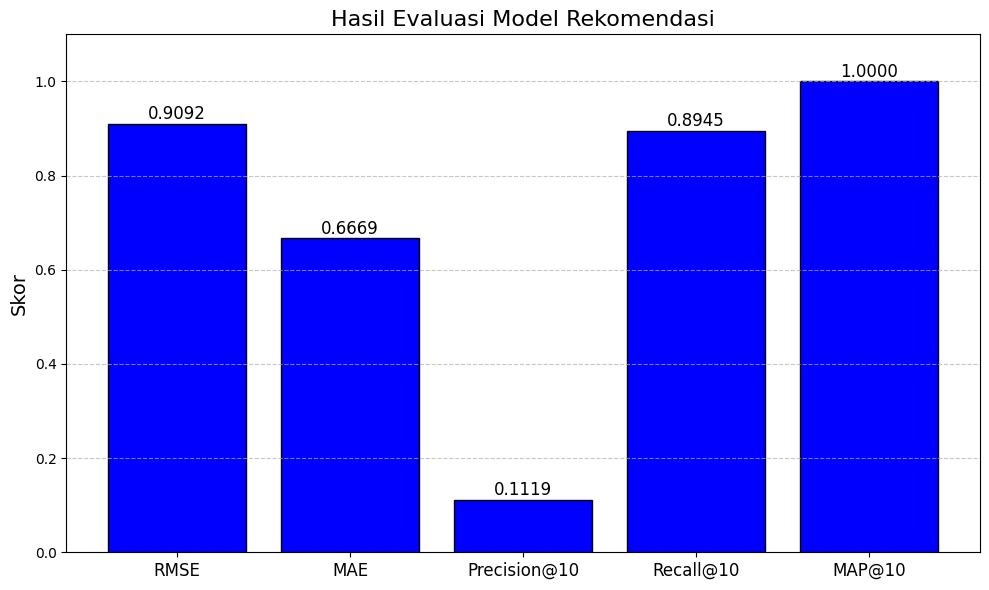

In [ ]:
# Menampilkan hasil evaluasi dalam bentuk diagram batang
evaluation_metrics = {
    "RMSE": rmse,
    "MAE": mae,
    "Precision@10": avg_precision_at_k,
    "Recall@10": avg_recall_at_k,
    "MAP@10": map_score
}

# Membuat plot diagram batang
plt.figure(figsize=(10, 6))
plt.bar(evaluation_metrics.keys(), evaluation_metrics.values(), color='blue', edgecolor='black')

# Menambahkan anotasi nilai di atas batang
for i, v in enumerate(evaluation_metrics.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)

# Konfigurasi plot
plt.title("Hasil Evaluasi Model Rekomendasi", fontsize=16)
plt.ylabel("Skor", fontsize=14)
plt.ylim(0, max(evaluation_metrics.values()) + 0.1)  # Menyesuaikan batas atas agar nilai anotasi tidak terpotong
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()